<a href="https://colab.research.google.com/github/manoharpavuluri/deep_learning1_mnist/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

%%time
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


CPU times: user 4.17 s, sys: 439 ms, total: 4.61 s
Wall time: 6.78 s


In [2]:
%%time
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()
print('X_train: ', len(X_train))
print('X_test: ', len(X_test))
print('X_train[0]_shape: ', X_train[0].shape)
print('y_train shape: ', y_train.shape)

X_train

11490434/11490434 [==============================] - 0s 0us/step
X_train:  60000
X_test:  10000
X_train[0]_shape:  (28, 28)
y_train shape:  (60000,)
CPU times: user 477 ms, sys: 68.6 ms, total: 546 ms
Wall time: 845 ms


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

y_train[0] :  5
y_train[1] :  0


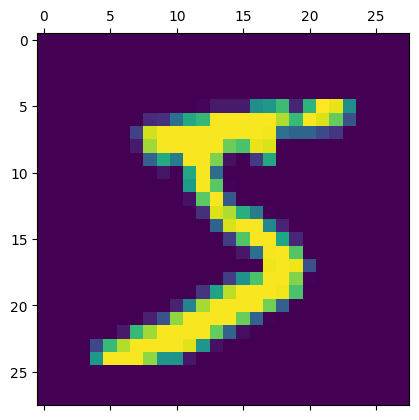

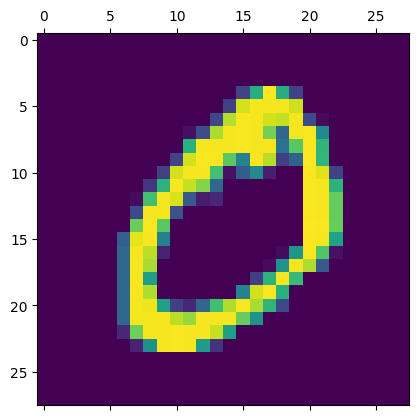

In [3]:
# matshow in matplotlib shows the character in the array
plt.matshow(X_train[0])
print('y_train[0] : ',y_train[0])
plt.matshow(X_train[1])
print('y_train[1] : ',y_train[1])

In [4]:
print('y_train[0] : ',y_train[0])
print('y_train[1] : ',y_train[1])


y_train[0] :  5
y_train[1] :  0


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
# scaling the data by the maximum value
X_train = X_train / 255
X_test = X_test / 255



In [7]:
# reshaping to convert bidirectional array to single layer as Tensorflow accepts single layer
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_train_flattened.shape

(60000, 784)

In [8]:
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [9]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [11]:
# creating a simple model with no hidden layer, and with activation function as Sigmoid
# by giving 10, you are saying the expection is to get 10 outputs ie 0-9. and 784 is the input layer
# epoch is 5 decides how many times it iterates to increase the accuracy
# Sequential means stack of layers in neural network. so each layer as one elment
# Dense means all the neurons in layer are connected to neurons of next layer. thats why it takes input and output. although input is optional when it commes to hidden layer.
# in tensorflow and keras, you need to compile the neural network as second step while passing differnt parameter
# fit is where the model is get trained on the training data for that many iteration specified in epochs


model = keras.Sequential([
   keras.layers.Dense(10, input_shape= (784,),activation='sigmoid')
])
model.compile(optimizer = 'adam',
          loss = 'sparse_categorical_crossentropy',
          metrics = ['accuracy']
      )

model.fit(X_train_flattened, y_train, epochs = 5)


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4690 - accuracy: 0.8776
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3041 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2834 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2735 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2667 - accuracy: 0.9262


In [ ]:
# measuring accuracy of the model on the test data. 92% not bad.

model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2684 - accuracy: 0.9245


[0.268428772687912, 0.9244999885559082]

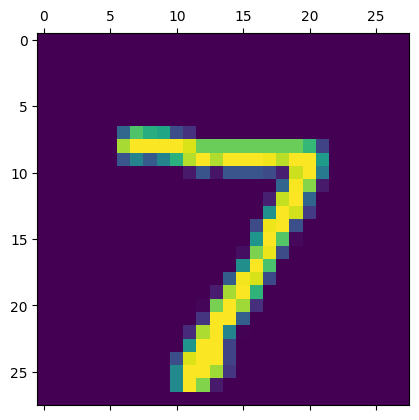

In [ ]:
# checking the first element

plt.matshow(X_test[0])

In [ ]:
# to check if the character matches to the predicted.
# below numbers are kinda weights of each number ie 0-9. so to find the number,
# we need to find the max one and its position ie array's index.

y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([2.9647866e-02, 6.8660671e-07, 9.4559036e-02, 9.7744811e-01,
       4.3094633e-03, 1.5270774e-01, 2.4436806e-06, 9.9981213e-01,
       1.6652219e-01, 7.1162891e-01], dtype=float32)

In [ ]:
# and the array index is 7 which matches the character above.

np.argmax(y_predicted[0])

7

In [ ]:
# getting max in each array to get the index representing the actual predicted number

y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
# now calculating confusion matrix

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    1,    3,    0,    5,    8,    2,    2,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   3,   11,  927,   19,    8,    3,   13,    8,   37,    3],
       [   3,    0,   18,  934,    1,   15,    2,    7,   23,    7],
       [   1,    2,    4,    2,  923,    0,   10,    3,   10,   27],
       [   8,    3,    4,   44,   11,  755,   17,    5,   39,    6],
       [   7,    3,    6,    1,    8,   10,  917,    2,    4,    0],
       [   1,    9,   26,   11,    9,    0,    0,  935,    2,   35],
       [   6,   13,    5,   25,   10,   21,   10,    7,  870,    7],
       [   9,    7,    2,   11,   39,    5,    0,   20,    9,  907]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

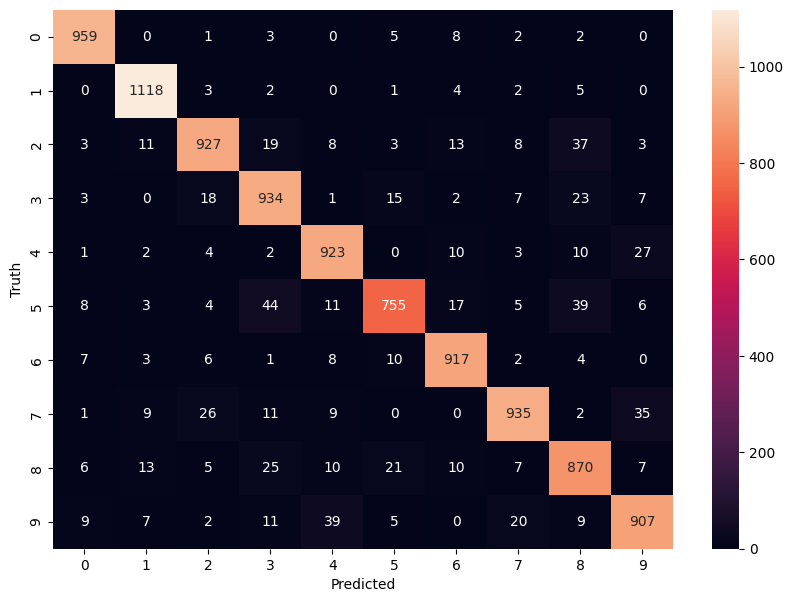

In [ ]:
# seeing confusion matrix in graphical using seaborn

import seaborn as sn
plt.figure(figsize =(10,7))
sn.heatmap(cm,annot =True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [ ]:
# now adding hidden layer.
# we are saying that 784 will lead into 100 neurons and activation function we are using is 'relu'
# and since we are saying output of the hidden layer is 100 neurons, we dont need to specify that in the output layer. so no input_shape

model = keras.Sequential([
    keras.layers.Dense(100, input_shape= (784,),activation='relu'),
   keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer = 'adam',
          loss = 'sparse_categorical_crossentropy',
          metrics = ['accuracy']
      )

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2695 - accuracy: 0.9233
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1230 - accuracy: 0.9637
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0848 - accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0657 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0505 - accuracy: 0.9844


In [ ]:
# and the accuracy on our test increased to 97% from 92%

model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0763 - accuracy: 0.9778


[0.07628562301397324, 0.9778000116348267]

In [ ]:
y_predicted_hidden = model.predict(X_test_flattened)
y_predicted_labels_hidden = [np.argmax(i) for i in y_predicted_hidden]

313/313 [==============================] - 2s 5ms/step


In [ ]:
cm_hiddnen = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels_hidden)
cm_hiddnen

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    1,    1,    1,    1,    4,    3,    1,    1,    0],
       [   0, 1119,    3,    2,    0,    0,    2,    1,    8,    0],
       [   5,    1,  994,    3,    4,    0,    4,    9,   12,    0],
       [   0,    0,    3,  990,    0,    3,    0,    5,    8,    1],
       [   1,    0,    4,    0,  968,    0,    4,    0,    0,    5],
       [   2,    0,    0,    5,    2,  875,    2,    1,    3,    2],
       [   2,    3,    0,    1,    6,    6,  937,    0,    3,    0],
       [   1,    2,    9,    2,    1,    0,    0, 1008,    1,    4],
       [   2,    0,    1,    6,    7,    4,    2,    6,  941,    5],
       [   1,    4,    0,    3,   11,    2,    1,    5,    3,  979]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

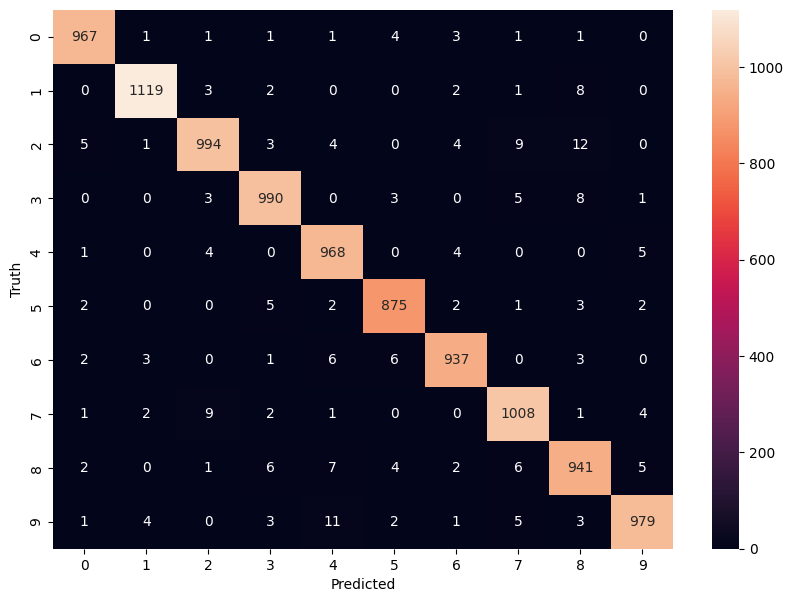

In [ ]:
# now re-seeing confusion matrix with hidden layer and to see if its improved


import seaborn as sn
plt.figure(figsize =(10,7))
sn.heatmap(cm_hiddnen,annot =True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# now instead flattening as preprossessing step, use keras inbuilt flatten function
# in this case, we dont have to explicitly mention input in the actual input layer.
# this is model is no different than earlier one, just adding different flatten function
# so there wont be any change in the model accuracy.


model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
   keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer = 'adam',
          loss = 'sparse_categorical_crossentropy',
          metrics = ['accuracy']
      )

model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2767 - accuracy: 0.9220
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1274 - accuracy: 0.9627
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0880 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0669 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0520 - accuracy: 0.9843
